### Predict income category of the individual

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
adult_df = pd.read_csv('adult_data.csv', header=None, delimiter=' *, *') # Its remove all kind spaces to variable  eg. @,#,?,/t--> for tab
# Its a special delimiter to remove the leading and training spaces around the values.

adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_df.shape

(32561, 15)

In [4]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult_df.describe(include="all")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Pre processing the data

In [6]:
# create a copy of the dataframe
adult_df_rev = pd.DataFrame.copy(adult_df)

In [7]:
adult_df_rev.duplicated().sum()

24

In [8]:
adult_df_rev.drop_duplicates(inplace=True)
adult_df_rev.shape

(32537, 15)

In [9]:
# Feature Selection first ,and then deal with missing variable
adult_df_rev.drop(["education","fnlwgt"],axis=1,inplace=True)
adult_df_rev.shape

(32537, 13)

Education is redundant to education number, final weight is the computed variable on the basis of age, race & sex.

In [10]:
# Handle the missing value

isnull().sum() --> only detect NAN, NA missing value.  Not detect the special character as missing values.

In [11]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [12]:
adult_df_rev.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [13]:
# int --> not present missing value
# object --> missing value is present in the form of spacial characters

In [14]:
for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

In [15]:
# Replace the ? (special character) with NAN

In [16]:
adult_df_rev.replace('?',np.nan,inplace=True)

In [17]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [18]:
# Since all the three variable are catogerical, we will used Mode approach

In [19]:
# replace the missing values with mode approach
for value in ['workclass', 'occupation', 
              'native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)
    
# The value will go to each variable and it will replace the missing value to unique value of 0 index

In [20]:
adult_df_rev[value].mode()[0]

'United-States'

In [21]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

The above code helped to remove null values using mode because the value was in categorical in nature

In [22]:
adult_df_rev.shape

(32537, 13)

In [23]:
"""
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)
"""

# This code can help us decide at the runtime how to fill the missig values based on the datatype of the variable.
# It should be used as a second hand approach.


# the X variable --> go to each column --> if matched with object/bool, it will fill with mode value of Zero indexed value.

"\nfor x in adult_df_rev.columns:\n    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)\n"

In [24]:
adult_df_rev.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

## Dummy variables using pd.get_dummies()

In [25]:

# helps reduce the dimensionality of 
adult_df_rev_new = pd.get_dummies(adult_df_rev, drop_first=True)
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,39,13,2174,0,40,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,50,13,0,0,13,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,38,9,0,0,40,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,53,7,0,0,40,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,28,13,0,0,40,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,Fals

In [26]:
adult_df_rev_new.shape

(32537, 82)

In [27]:
adult_df_rev_new.dtypes

age                               int64
education_num                     int64
capital_gain                      int64
capital_loss                      int64
hours_per_week                    int64
                                  ...  
native_country_Trinadad&Tobago     bool
native_country_United-States       bool
native_country_Vietnam             bool
native_country_Yugoslavia          bool
income_>50K                        bool
Length: 82, dtype: object

In [28]:
colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [29]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder        # import OneHotEncoder()
 
le=LabelEncoder()
 
for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
"""
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
""" 

"\n    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))\n    print('Feature', x)\n    print('mapping', le_name_mapping)\n"

In [30]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Feature', x)
print('mapping', le_name_mapping)

Feature income
mapping {'<=50K': 0, '>50K': 1}


In [31]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [32]:
# In industry, this approach is used widely
data={"Gender":["Female", "Male","Female"] }
df=pd.DataFrame(data)
df.head()

,Gender
0,Female
1,Male
2,Female


In [33]:
le_gender=LabelEncoder()
df["Gender"]=le_gender.fit_transform(df["Gender"])
df.head()

,Gender
0,0
1,1
2,0


In [34]:
df["Gender"]=le_gender.inverse_transform(df["Gender"])
df.head()

,Gender
0,Female
1,Male
2,Female


In [35]:
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [36]:
X = adult_df_rev.values[:,0:-1]  #--> 0 to -2
Y = adult_df_rev.values[:,-1]

# .values will return an array whereas .loc will return a df object
# arrays are lighter in weigth which indirectly help the model to build faster.

In [37]:
print(X.shape)
print(Y.shape)

(32537, 12)
(32537,)


In [38]:
# Before Building the model, Do Scaling because it will improve the model.
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(X)
X = scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [39]:
# if Y is Object, Convert Y into INT DATATYPE, for not getting Error.

Y = Y.astype(int)

### Running a basic model

In [40]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,  # Default value -> test_size= 0.25
                                                    random_state=10)

In [41]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(22775, 12)
(22775,)
(9762, 12)
(9762,)


In [42]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()
#train the model object
classifier.fit(X_train,Y_train)      # fit is the function that is used for training the data

Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [43]:
# Probability Matrix : Probability of every obs in data belonging to class 0 and 1.
# helps us to get final predicted value
Y_pred_prob = classifier.predict_proba(X_test)
Y_pred_prob

array([[0.89035269, 0.10964731],
       [0.98760641, 0.01239359],
       [0.98078365, 0.01921635],
       ...,
       [0.87474272, 0.12525728],
       [0.97246196, 0.02753804],
       [0.87430819, 0.12569181]])

In [44]:
print(list(zip(Y_test,Y_pred)))

# 0 --> <=50k
# 1 --> >50k

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0),

**0 --> <=50k**

**1 --> >50k**

**(0,0)
(1,1) ----> Correct Classification**

**(0,1)
(1,0) ---> Mis-Classification**

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7012  384]
 [1296 1070]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.74      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8279041180086048


## Tunning

## Adjusting the Threshold

In [46]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.89035269 0.10964731]
 [0.98760641 0.01239359]
 [0.98078365 0.01921635]
 ...
 [0.87474272 0.12525728]
 [0.97246196 0.02753804]
 [0.87430819 0.12569181]]


In [47]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[6928  468]
 [1174 1192]]
Accuracy of the model:  0.8317967629584102
              precision    recall  f1-score   support

           0       0.86      0.94      0.89      7396
           1       0.72      0.50      0.59      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.72      0.74      9762
weighted avg       0.82      0.83      0.82      9762



**Always try to search for optimum threshold where the overall error is minumum and the type 2 error is also lower.**


**We are keeping the threshold to 0.46,
Without affecting class 0, we have improved the class 1 recall and f1 score by 3% which is 57 to 59%.**

In [49]:
# Trial and Error Approch --> decide you to take the best threshold value with the lowest Type 2 Error
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0) # acts as an if else statement
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]  # Addition of Type 1 and Type 2 error
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1672  , type 2 error : 1022  , type 1 error: 650
Errors at threshold  0.41000000000000003 : 1657  , type 2 error : 1047  , type 1 error: 610
Errors at threshold  0.42000000000000004 : 1665  , type 2 error : 1077  , type 1 error: 588
Errors at threshold  0.43000000000000005 : 1662  , type 2 error : 1103  , type 1 error: 559
Errors at threshold  0.44000000000000006 : 1652  , type 2 error : 1127  , type 1 error: 525
Errors at threshold  0.45000000000000007 : 1648  , type 2 error : 1147  , type 1 error: 501
Errors at threshold  0.4600000000000001 : 1642  , type 2 error : 1174  , type 1 error: 468
Errors at threshold  0.4700000000000001 : 1649  , type 2 error : 1202  , type 1 error: 447
Errors at threshold  0.4800000000000001 : 1668  , type 2 error : 1241  , type 1 error: 427
Errors at threshold  0.4900000000000001 : 1667  , type 2 error : 1265  , type 1 error: 402
Errors at threshold  0.5000000000000001 : 1680  , type 2 error : 1296  , type 1 error: 384
Errors at

### AUC: Area under curve
#### This approch is use to decide between multiple threshold which one to choose.



In [50]:
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1]) # passing y_pred_prob[:,1] for multiple threshold
auc = metrics.auc(fpr,tpr)
print(auc)

0.8613964871921356


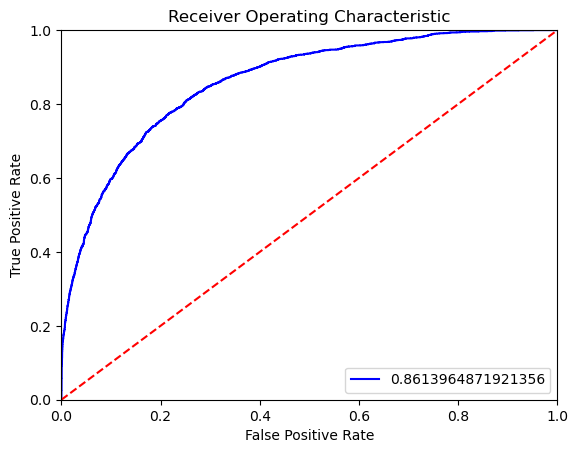

In [51]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

**On the basic of auc value based on different threshold value, predicting how good your model is**


**AUC :
0.5 -> worst 
0.6 - 0.7 -> bad
0.7 - 0.8 -> good
0.8 - 0.9 -> V.good
0.9 - 1.0  -> Excellent**
    

In [52]:
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class) # passing y_pred_prob[:,1] for multiple threshold
auc = metrics.auc(fpr,tpr)
print(auc)

0.7202632205752395


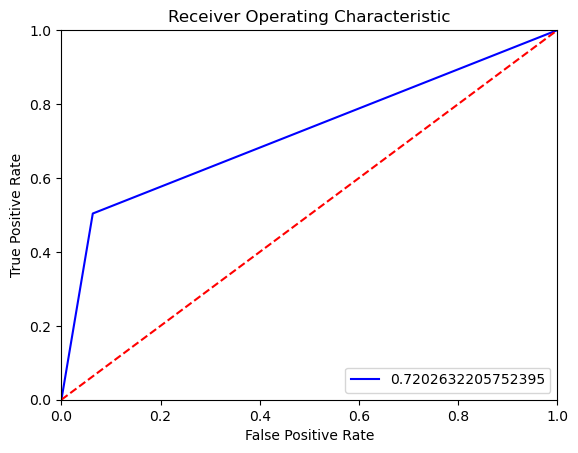

In [53]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

**Steps for AUC
AUC:**

**1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.**

**2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)**

**3. Finally conclude upon the threshold which gives you an highest AUC closest to the overall AUC.**

# Testing File - Adult_Test_Data

In [54]:
adult_df = pd.read_csv('adult_test.csv', header=None, delimiter=' *, *') # Its remove all kind spaces to variable  eg. @,#,?,/t--> for tab
# Its a special delimiter to remove the leading and training spaces around the values.

adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [55]:
adult_df.shape

(16281, 15)

In [56]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


# Pre-processing the data

In [57]:
adult_test = pd.DataFrame.copy(adult_df)

In [58]:
# Never drop duplicated value in test data.
#adult_test.drop_duplicates(inplace=True)
adult_test.shape

(16281, 15)

In [59]:
#nan value code

In [60]:
# Feature Selection first ,and then deal with missing variable 
adult_test.drop(["education","fnlwgt"],axis=1,inplace=True)
adult_test.shape

(16281, 13)

Education is redundant to education number, final weight is the computed variable on the basis of age, race & sex.

In [61]:
# Handle the missing value

isnull().sum() --> only detect NAN, NA missing value. Not detect the special character as missing values

In [62]:
adult_test.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [63]:
adult_test.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [64]:
# int --> not present missing value
# object --> missing value is present in the form of spacial characters

In [65]:
# Replace the ? (special character) with NAN

In [66]:
adult_test.replace('?',np.nan,inplace=True)

In [67]:
adult_test.isnull().sum()

age                 0
workclass         963
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [68]:
# Since all the three variable are catogerical, we will used Mode approach

In [69]:
# Converting Categorical values to Numerical
# replace the missing values with mode approach
for value in ['workclass', 'occupation', 
              'native_country']:
    adult_test[value].fillna(adult_test[value].mode()[0],inplace=True)
    
# The value will go to each variable and it will replace the missing value to unique value of 0 index

In [70]:
adult_test[value].mode()[0]

'United-States'

In [71]:
adult_test.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

The above code helped to remove null values using mode because the value was in categorical in nature

In [72]:
adult_test.shape

(16281, 13)

In [73]:
# convert categorical data into numerical
colname=[]
for x in adult_test.columns:
    if adult_test[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [74]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder        # import OneHotEncoder()
 
le=LabelEncoder()
 
for x in colname:
    adult_test[x]=le.fit_transform(adult_test[x])

In [75]:
adult_test.head() 

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,7,4,6,3,2,1,0,0,40,37,0
1,38,3,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,3,10,2,6,0,2,1,7688,0,40,37,1
4,18,3,10,4,9,3,4,0,0,0,30,37,0


In [76]:
# Creating X and Y
X_test_new = adult_test.values[:,0:-1]  #--> 0 to -2
Y_test_new = adult_test.values[:,-1]

In [77]:
print(X_test_new.shape)
print(Y_test_new.shape)

(16281, 12)
(16281,)


In [78]:
# we fit the scalar object only on the training data 
# & use the same object to tansform the both the training as well as the testing data.
# we never fit in testing data because the mean and standard deviation return by the test data could be different from the mean and std dev of the trained data. 
# & It could lead to inconsistent data after conversion
X_test_new=scaler.transform(X_test_new)

In [79]:
print(X_test_new)

[[-0.99617055 -0.08527638 -1.19840658 ... -0.21674317 -0.03566374
   0.09594355]
 [-0.0429358  -0.08527638 -0.42067868 ... -0.21674317  0.77426932
   0.09594355]
 [-0.7761933  -1.89109329  0.74591317 ... -0.21674317 -0.03566374
   0.09594355]
 ...
 [-0.0429358  -0.08527638  1.13477712 ... -0.21674317  0.77426932
   0.09594355]
 [ 0.3970187  -0.08527638  1.13477712 ... -0.21674317 -0.03566374
   0.09594355]
 [-0.26291305  0.81763207  1.13477712 ... -0.21674317  1.58420237
   0.09594355]]


In [80]:
# if Y is Object, Convert Y into INT DATATYPE, for not getting Error.

Y_test_new = Y_test_new.astype(int)

# Tunning

# Adjusting the Threshold

In [81]:
Y_pred_prob=classifier.predict_proba(X_test_new)

In [82]:
# When we have to predict the Y_pred value
Y_pred_new=[]
for value in Y_pred_prob[:,1]:
    if value > 0.46:
        Y_pred_new.append(1)
    else:
        Y_pred_new.append(0)

In [83]:
print(Y_pred_new)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

In [84]:
# Comparing the Testing  Y_test_new Data into Y_pred_new.
# when we have the Y_pred value, use this
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test_new,Y_pred_new)
print(cfm)
acc=accuracy_score(Y_test_new,Y_pred_new)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test_new,Y_pred_new))

[[11559   876]
 [ 1988  1858]]
Accuracy of the model:  0.8240894293962288
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     12435
           1       0.68      0.48      0.56      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.71      0.73     16281
weighted avg       0.81      0.82      0.81     16281



In [85]:
# In my file the value are in numerical value. Convert it to categorical value then send it

adult_test = pd.read_csv('adult_test.csv', header=None, delimiter=' *, *') # Its remove all kind spaces to variable  eg. @,#,?,/t--> for tab
# Its a special delimiter to remove the leading and training spaces around the values.

adult_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']


In [86]:
# Save the file and send to cilent.
# Adding a new col and saving into new variable.

adult_test["Predictions"]=Y_pred_new
adult_test.to_excel("output_adult_test.xlsx", header=True, index=False)

In [87]:
#Using cross validation
 
classifier=LogisticRegression() # Works on all type of Algorithm
 
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())    # this code block to be used only when we observe a drastic difference between the k-fold accuracy vs the base model accuracy.

[0.81957858 0.82835821 0.82791923 0.81562774 0.82001756 0.82345191
 0.82345191 0.82784365 0.82301274 0.81774264]
0.8227004171577977


The original model is performing good, no need to change any thing.

My Model is Durable 

In [88]:
#model tuning   -----> It will take a lot time to load, Run on GPU.
#   k-1--> 9 folds for training  , 1 folds --> for testing data
for train_value, test_value in kfold_cv.split(X_train, Y_train): # It will split training data into 10 folds
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
 
Y_pred=classifier.predict(X_test) # Actual Test Data
#print(list(zip(Y_test,Y_pred)))

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7007  389]
 [1293 1073]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.73      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.827699241958615


In [90]:
# StratifiedKFold is less used in industry
#Using cross validation
 
classifier=LogisticRegression() # Works on all type of Algorithm
 
#performing kfold_cross_validation
from sklearn.model_selection import StratifiedKFold
kfold_cv=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())    # this code block to be used only when we observe a drastic difference between the k-fold accuracy vs the base model accuracy.

[0.82221247 0.82923617 0.82440737 0.81562774 0.81562774 0.81598595
 0.83662714 0.82608696 0.82476943 0.82301274]
0.8233593714755679


In [91]:
#model tuning   -----> It will take a lot time to load, Run on GPU.
#   k-1--> 9 folds for training  , 1 folds --> for testing data
for train_value, test_value in kfold_cv.split(X_train, Y_train): # It will split training data into 10 folds
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
 
Y_pred=classifier.predict(X_test) # Actual Test Data
#print(list(zip(Y_test,Y_pred)))

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7011  385]
 [1294 1072]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.74      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8280065560335996


Accuracy for the StratifiedKFold model is 0.8280065560335996

## Feature Selection using Resursive Feature Selection

**Recursive Feature Elimination:**

1st-All the independent variables (X) will be considered and the model will be built. It will eliminate the variable which has the least significance in the model.

2nd-(X-1) variables will be considered and the model will be rebuilt.
The process continues till the time we are left off with the given no of variables in the model.
RFE model will be ready to predict upon the testing data.

It follows an itertive process. hence, consumes time.

Deciding the number of fetures to retain is an Trail and Error task

In [93]:
colname=adult_df_rev.columns

In [94]:
from sklearn.feature_selection import RFE
rfe = RFE(classifier, n_features_to_select=8)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_) # No of features which 
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_))) # Supports --> gives in boolean value. value which are retained--> True, value which is eliminated--> False
print("Feature Ranking: ", model_rfe.ranking_) # ranking_ -> order in which the elimination happen. eg. the highest rank 5 indicates the native country was eliminated in the first iteration. 

Num Features:  8
Selected Features: 
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 3 1 1 4 1 2 1 1 1 1 5]


# Evaluation metrics

In [95]:
Y_pred=model_rfe.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7014  382]
 [1281 1085]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7396
           1       0.74      0.46      0.57      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8296455644335177


**0.8296455644335177** Accuracy is gain in this **RFE model**, which is highest accuracy.

Recall Value for Class 0 is **0.95**

Recall Value for Class 1 is **0.46**

In [97]:
"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""
#in case the RFE eliminates logically relevant variables, create a  new df manually by subsetting the variables derived from RFE as well as on the basis of domain knowledge.
#rest of the model building steps will have to be performed manually

"new_data=adult_df_rev[['age','workclass','occupation','sex','income']]\nnew_data.head()\nnew_X=new_data.values[:,:-1]\nnew_Y=new_data.values[:,-1]\nprint(new_X)\nprint(new_Y)\n"

## SFS

SFS is a **forward feature selection technique** which uses an iterative process where it start with 1 best variable & keeps on adding 1 new variable in each iteration. 

It uses the cv process to generate accuaracy at each iteration which helps us decide on the best combination of variables. 

We can then use this combination of variables to build the final model.

In [98]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#Define Sequential Forward Selection (sfs)
sffs = SFS(LogisticRegression(),
           k_features="best",
           forward=True,
           scoring = 'accuracy',
           cv = 5)                                  # perform the 5 fold cross validation
#Use SFS to select the top features 
feature_names=adult_df_rev.columns[:-1]
sffs.fit(X_train, Y_train)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(1, 12),
                          scoring='accuracy')

In [99]:
#Create a dataframe for the SFS results 
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose() # Rows 
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(8,)","[0.8008781558726674, 0.801536772777168, 0.8017...",0.799605,"(8,)"
2,"(8, 9)","[0.8059275521405049, 0.8182217343578485, 0.814...",0.811811,"(8, 9)"
3,"(1, 8, 9)","[0.8065861690450055, 0.8171240395170143, 0.814...",0.811592,"(1, 8, 9)"
4,"(1, 8, 9, 11)","[0.8052689352360044, 0.817563117453348, 0.8129...",0.81067,"(1, 8, 9, 11)"
5,"(1, 2, 8, 9, 11)","[0.8074643249176728, 0.8118551042810099, 0.814...",0.809308,"(1, 2, 8, 9, 11)"
6,"(1, 2, 5, 8, 9, 11)","[0.8162458836443469, 0.8239297475301867, 0.818...",0.818793,"(1, 2, 5, 8, 9, 11)"
7,"(1, 2, 5, 7, 8, 9, 11)","[0.8217343578485181, 0.8252469813391877, 0.822...",0.821603,"(1, 2, 5, 7, 8, 9, 11)"
8,"(1, 2, 5, 7, 8, 9, 10, 11)","[0.8151481888035126, 0.827661909989023, 0.8239...",0.82371,"(1, 2, 5, 7, 8, 9, 10, 11)"
9,"(0, 1, 2, 5, 7, 8, 9, 10, 11)","[0.8199780461031834, 0.8261251372118551, 0.825...",0.823754,"(0, 1, 2, 5, 7, 8, 9, 10, 11)"
10,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11)","[0.8206366630076839, 0.8287596048298573, 0.825...",0.824457,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11)"


In [100]:
# Use this combination (10) & trying building and Evaluate the model

In [101]:
X = adult_df_rev.values[:,[0, 1, 2, 5, 6, 7, 8, 9, 10, 11]]
Y = adult_df_rev.values[:,-1]

In [102]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(X)
X = scaler.transform(X)

**Running a basic model**

In [103]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,  # Default value -> test_size= 0.25
                                                    random_state=10)

In [104]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()
#train the model object
classifier.fit(X_train,Y_train)      # fit is the function that is used for training the data

Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7051  345]
 [1313 1053]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.75      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.80      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8301577545584922


Resursive we are getting 82% accuracy, In this case we are getting slightly better accuracy 0.8301577545584922.

**Feature Selection using Univariate Selection**

In [106]:
# CHI-SQUARE Method
# It is Filter method.
# Used chi-squre when more Categorical value is present. (not used in industry)
# Used Correlation when more numerical value is present. (used mostly in industry)
# It is Restricted to work upon the positive values. (Doesnt work upon -ve value)
# It will find the chi-square value of each variable. 
# 

In [107]:
# Cretaing X and Y
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [108]:
# Select K Best should be implemented on positive value data, so we should apply it on Unscaled data.
# Select K Best identifies the chi-squre values of every variable in the data & help us subset K Highest Valued Chi-squared variables.
# This technique is suitable when we have more Categorical variable. whereas Corrleation is preferred when we have numerical variable.

In [109]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
test = SelectKBest(score_func=chi2, k=10) # find Top 10 variable out of 12
fit1 = test.fit(X, Y) 
 
colname=adult_df_rev.columns
print(fit1.scores_) # gives 12 chi-squre values
print(list(zip(colname,fit1.get_support()))) # gives boolean values, which are selected or eliminated
X_new = fit1.transform(X)  # It gives 10 best chi-square values


[8.59031713e+03 9.41445133e-02 2.39903589e+03 1.12172183e+03
 9.96668120e+01 3.65821506e+03 3.30121759e+01 5.01968535e+02
 8.21362443e+07 1.37062169e+06 6.46886542e+03 1.70998658e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]


In [110]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(X_new)
X = scaler.transform(X_new)

In [111]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,  # Default value -> test_size= 0.25
                                                    random_state=10)

In [112]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()
#train the model object
classifier.fit(X_train,Y_train)      # fit is the function that is used for training the data

Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7015  381]
 [1281 1085]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7396
           1       0.74      0.46      0.57      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8297480024585125


The Accuracy for Chi-square method is 0.8297480024585125

In [114]:
# Variance Threshold :- 

# Variance Threshold identifies a variances of every variable in data and based on the threshold provided it eliminated those variable which are less percent of variance compare to the given Threshold. 
# The Default value for threshold is 0 which means It will eliminate the singular variable in that case

In [115]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [116]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.1)                # Default Threshold value is 0.  If in a variable if you find less than 0.1, Eliminate it.  (Majority happens with Gender)
fit1 = vt.fit(X, Y)
print(fit1.variances_) # It gives 12 variable ka 12 variance value
 
features = fit1.transform(X)
print(features.shape[1])  # No of vaiable which are in features.
print(list(zip(adult_df_rev.columns,fit1.get_support())))

[1.85988878e+02 1.22662712e+00 6.61309308e+00 2.26887148e+00
 1.57856209e+01 2.58257530e+00 7.20519181e-01 2.21358466e-01
 5.45802374e+07 1.62486094e+05 1.52440987e+02 3.66475626e+01]
12
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]


In [117]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(X_new)
X = scaler.transform(X_new)

In [118]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,  # Default value -> test_size= 0.25
                                                    random_state=10)

In [119]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()
#train the model object
classifier.fit(X_train,Y_train)      # fit is the function that is used for training the data

Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7015  381]
 [1281 1085]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7396
           1       0.74      0.46      0.57      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8297480024585125
